<a href="https://colab.research.google.com/github/charliashby/labs/blob/main/Ashby_01APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Practice Writing Queries
# https://api.eia.gov/v2/electricity/retail-sales/data/

In [3]:
#2 Accessing APIs with Python
import requests
import pandas as pd

# Define the API endpoint and parameters
url = 'https://api.eia.gov/v2/electricity/retail-sales/data/'
params = {
    'api_key': '2IvHTDfUnIsNGxhDEqcao8kHTMgmSaKOK6ihwmIs',  # Replace with your actual API key
    'frequency': 'monthly',
    'data[0]': 'customers',
    'sort[0][column]': 'period',
    'sort[0][direction]': 'desc',
    'offset': 0,
    'length': 5000
}

# Fetch data from the API
response = requests.get(url, params=params)
data = response.json()

# Convert JSON data to DataFrame
df = pd.DataFrame(data['response']['data'])

# Display the first few rows of the DataFrame
print(df.head())


    period stateid stateDescription sectorid   sectorName customers  \
0  2024-06      OK         Oklahoma      IND   industrial     18626   
1  2024-06      MA    Massachusetts      RES  residential   2834310   
2  2024-06      MA    Massachusetts      OTH        other      None   
3  2024-06      MA    Massachusetts      IND   industrial      9850   
4  2024-06      MA    Massachusetts      COM   commercial    435471   

       customers-units  
0  number of customers  
1  number of customers  
2  number of customers  
3  number of customers  
4  number of customers  


In [4]:
#3 Wrangling the Data
# Convert period to datetime for easier analysis
df['period'] = pd.to_datetime(df['period'])

# Check for missing values and handle them if necessary
print(df.isnull().sum())

# If needed, fill or drop missing values
df.fillna(method='ffill', inplace=True)

# Sort the DataFrame by period for time series analysis
df.sort_values('period', inplace=True)

period                0
stateid               0
stateDescription      0
sectorid              0
sectorName            0
customers           833
customers-units       0
dtype: int64


<ipython-input-4-6e3a6975dfa3>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


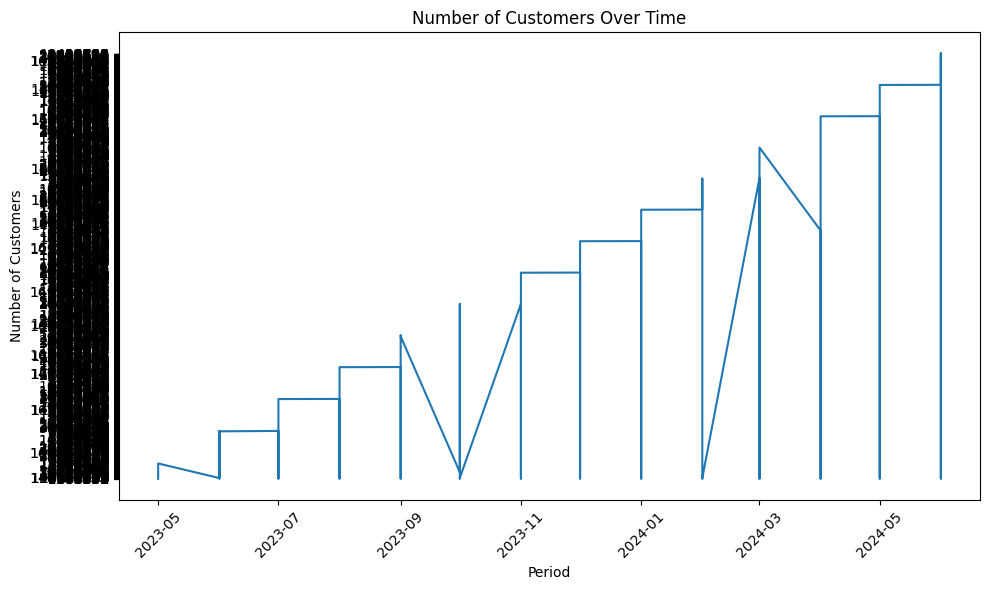

In [12]:
# EDA
import matplotlib.pyplot as plt

# Plot number of customers over time
plt.figure(figsize=(10, 6))
plt.plot(df['period'], df['customers'], label='Customers')
plt.title('Number of Customers Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()